# Pairwise predictor analysis

In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

from prep_data import \
    mazes,\
    model_preds,\
    get_exp1_at,\
    get_exp2_at,\
    get_exp3_at__exp3_mt,\
    get_exp4a_ht,\
    get_exp4b_ht
from analysisutils import short_predictor_names
import analysisutils

from vgc_project.r import create_R_model_interface, ImmutableDataFrame
joblib_cache_location = "./_analysiscache"
rmods = create_R_model_interface(joblib_cache_location=joblib_cache_location)


In [2]:
predictors = [
    'dynamic_vgc_weight',
    'log_traj_based_hitcount',
    'graph_based_hitcount',
    'bottleneck_dist',
    'sr_occ',
    'nav_mindist',
    'nav_mindist_timestep',
    'goal_dist',
    'start_dist',
    'optpolicy_dist',
    'walls_dist',
    'center_dist',
]

In [3]:
exp1_at = get_exp1_at()
exp1_at_im = ImmutableDataFrame(exp1_at)
exp1_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 1 Awareness",
    data=exp1_at_im,
    dv="attention_N",
    model_func="lmer",
    random_effects="(1 | sessionId) + (1 | grid)",
    predictors=[p for p in predictors if "optpolicy_" not in p],
    rmods=rmods
)

exp2_at = get_exp2_at()
exp2_at_im = ImmutableDataFrame(exp2_at)
exp2_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 2 Awareness",
    data=exp2_at_im,
    dv="attention_N",
    model_func="lmer",
    random_effects="(1 | sessionId) + (1 | grid)",
    predictors=[p for p in predictors if 'nav_mindist' not in p],
    rmods=rmods
)

exp3_at, exp3_mt = get_exp3_at__exp3_mt()
exp3_at_im = ImmutableDataFrame(exp3_at)
exp3_mt_im = ImmutableDataFrame(exp3_mt)
exp3_correct_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 3 Accuracy",
    data=exp3_mt_im,
    dv="correct",
    model_func="glmer",
    random_effects="(1 | sessionId)",
    predictors=[p for p in predictors if "optpolicy_" not in p],
    rmods=rmods
)
exp3_conf_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 3 Confidence",
    data=exp3_mt_im,
    dv="conf_N",
    model_func="lmer",
    random_effects="(1 | sessionId)",
    predictors=[p for p in predictors if "optpolicy_" not in p],
    rmods=rmods
)
exp3_attn_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 3 Awareness",
    data=exp3_at_im,
    dv="attention_N",
    model_func="lmer",
    random_effects="(1 | sessionId)",
    predictors=[p for p in predictors if "optpolicy_" not in p],
    rmods=rmods
)

exp4a_ht = get_exp4a_ht()
exp4b_ht = get_exp4b_ht()
exp4a_ht_im = ImmutableDataFrame(exp4a_ht)
exp4b_ht_im = ImmutableDataFrame(exp4b_ht)
exp4a_hov_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 4a Hover",
    data=exp4a_ht_im,
    dv="hovered",
    model_func="glmer",
    random_effects="(1 | sessionId) + (1 | grid)",
    predictors=[p for p in predictors if 'nav_mindist' not in p],
    rmods=rmods
)
exp4a_dur_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 4a Hover Duration",
    data=exp4a_ht_im,
    dv="log_hoverduration",
    model_func="lmer",
    random_effects="(1 | sessionId) + (1 | grid)",
    predictors=[p for p in predictors if 'nav_mindist' not in p],
    rmods=rmods
)
exp4b_hov_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 4b Hover",
    data=exp4b_ht_im,
    dv="hovered",
    model_func="glmer",
    random_effects="(1 | sessionId) + (1 | grid)",
    predictors=[p for p in predictors if 'nav_mindist' not in p],
    rmods=rmods
)
exp4b_dur_pairwise_models = analysisutils.pairwise_predictors_analysis(
    name="Exp. 4b Hover Duration",
    data=exp4b_ht_im,
    dv="log_hoverduration",
    model_func="lmer",
    random_effects="(1 | sessionId) + (1 | grid)",
    predictors=[p for p in predictors if 'nav_mindist' not in p],
    rmods=rmods
)


Loading Experiment 1 Attention Trials


100%|██████████| 100/100 [00:11<00:00,  8.60it/s]


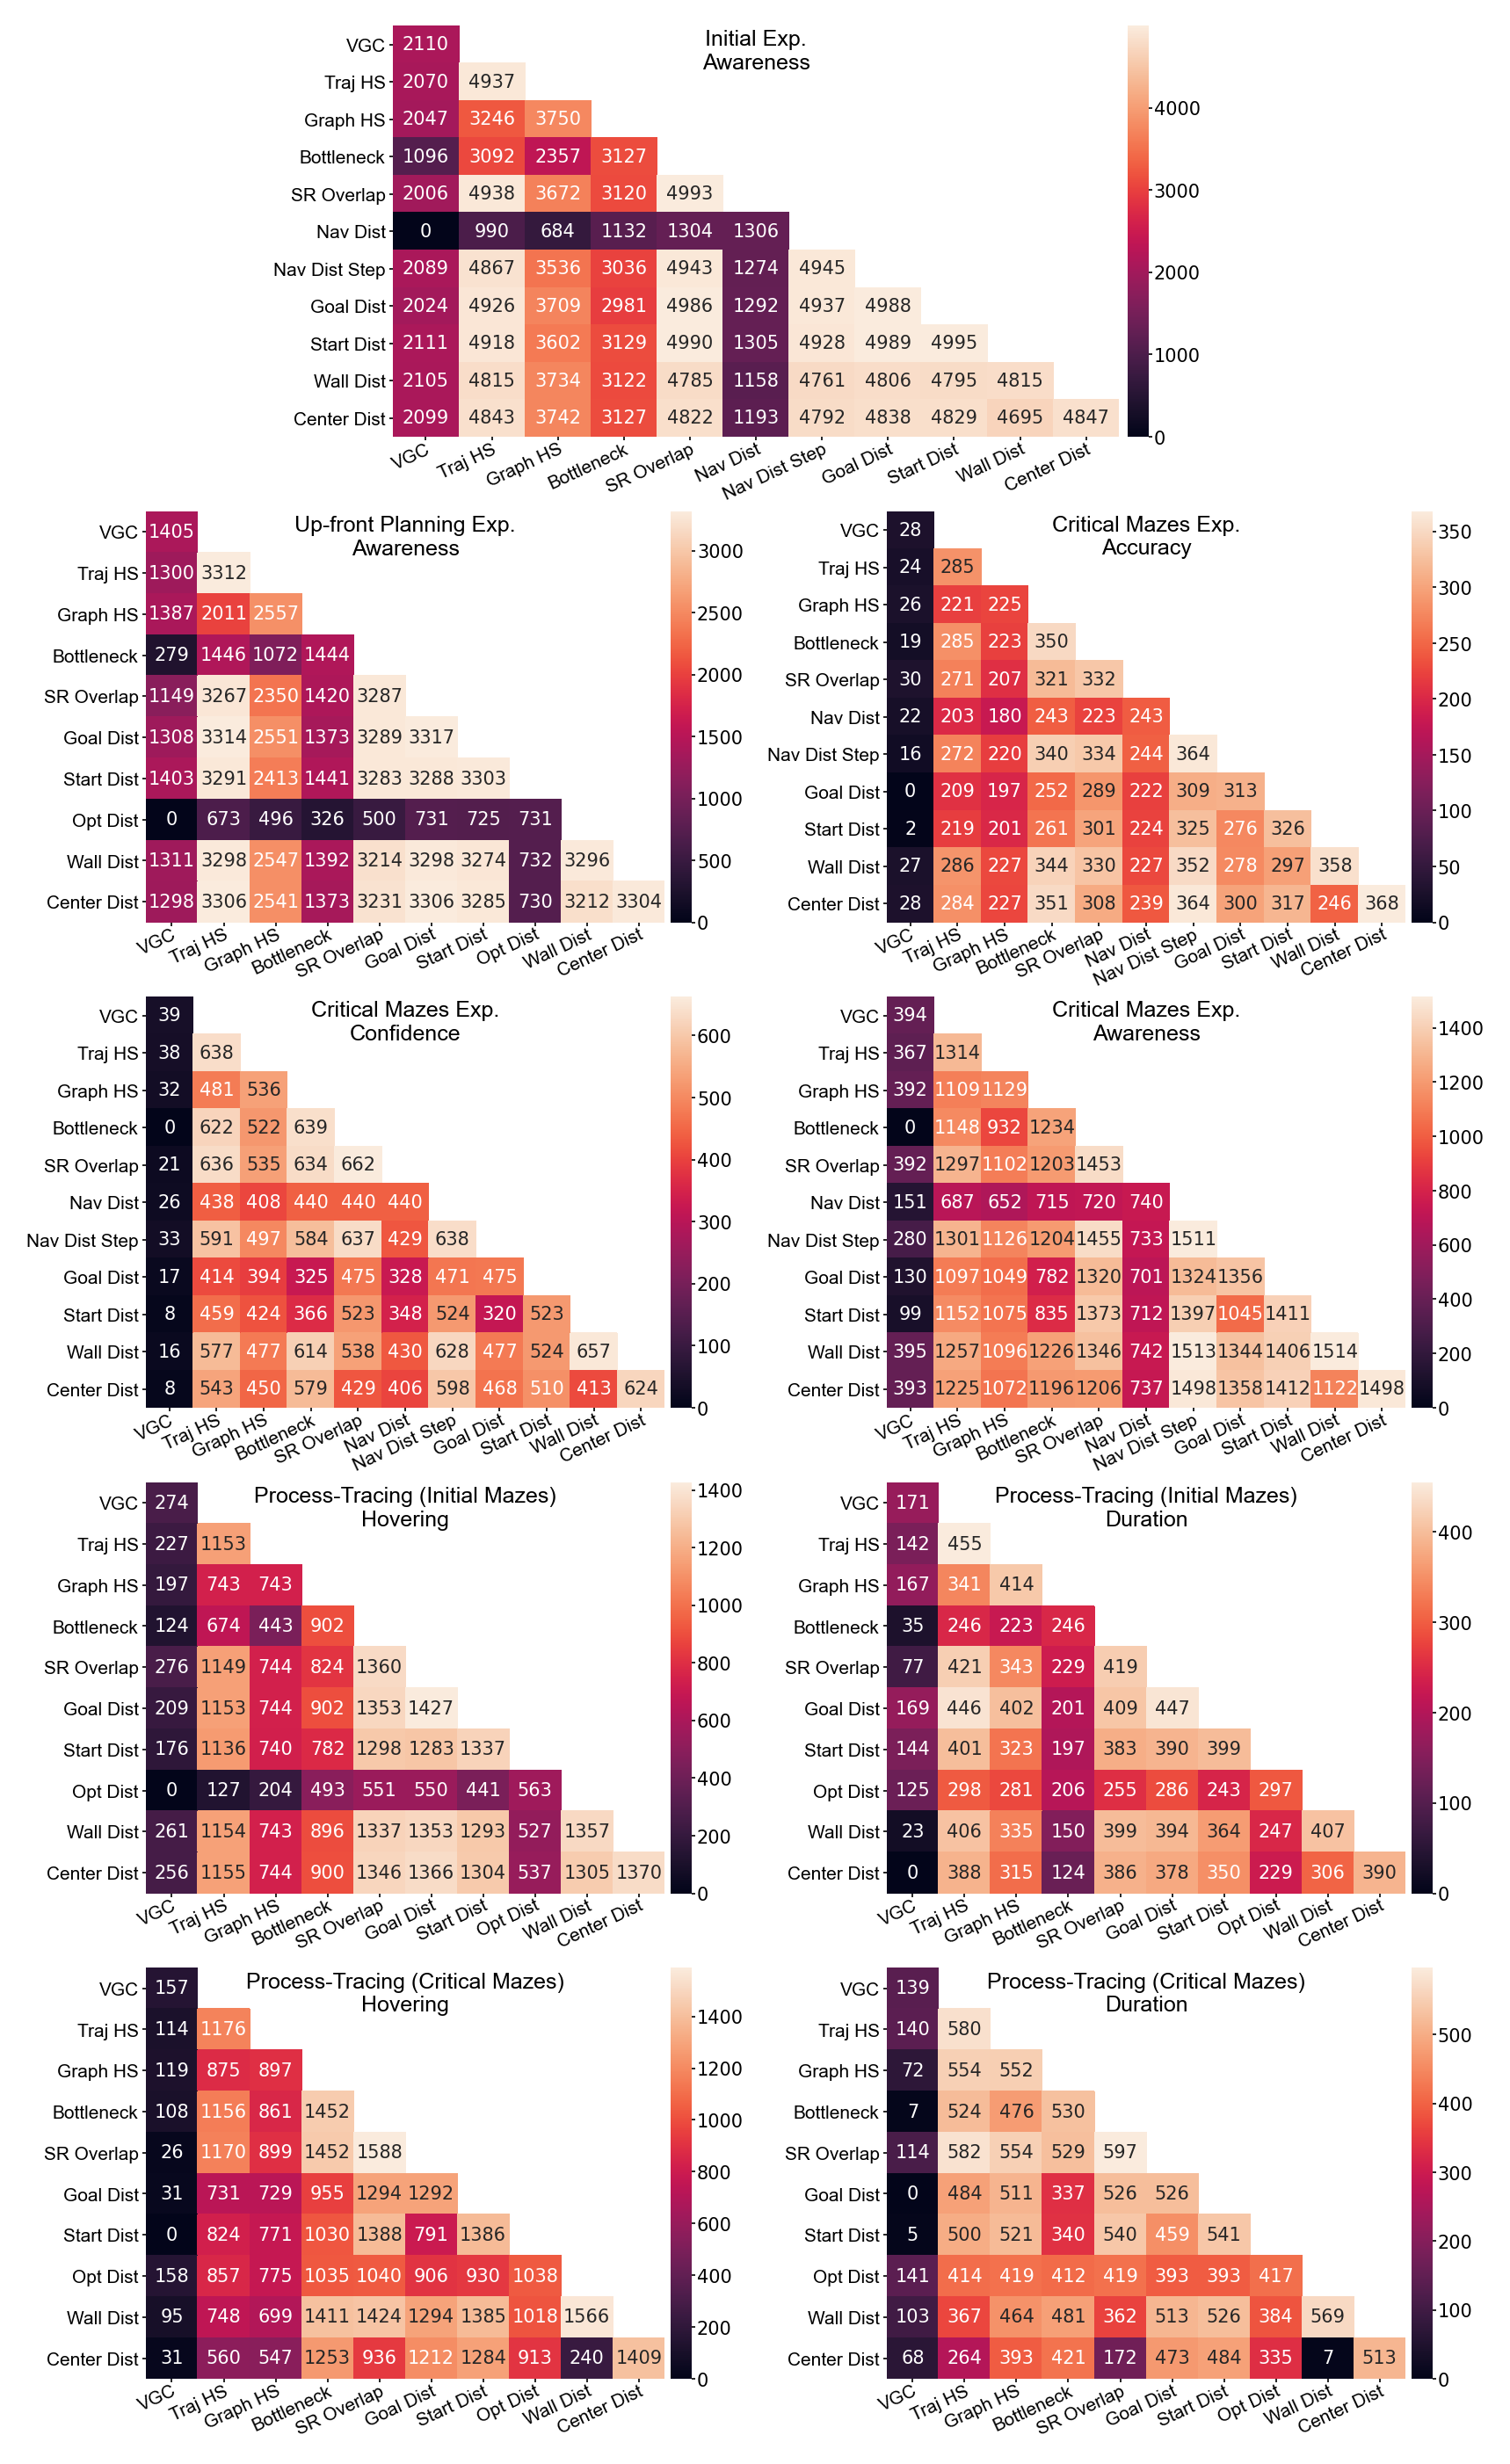

In [4]:
import seaborn as sns

# create figure
fig_width_mm = 150
fig_height_mm = 240
mm_to_inch = 1/25.4 

assert fig_width_mm <= 182
assert fig_height_mm <= 245

import matplotlib.gridspec as gridspec
fig = plt.figure(
    figsize=(fig_width_mm*mm_to_inch, fig_height_mm*mm_to_inch),
    dpi=300
)
gs = gridspec.GridSpec(5, 6)
axes = [
    fig.add_subplot(gs[0, 1:-1]),
    *sum([
        [
            fig.add_subplot(gs[row_i, :3]),
            fig.add_subplot(gs[row_i, 3:])
        ] for row_i in range(1, 5)
    ], [])
]
    
all_pairwise_models = [
    dict(models=exp1_pairwise_models, name="Initial Exp.\nAwareness"),
    dict(models=exp2_pairwise_models, name="Up-front Planning Exp.\nAwareness"),
    dict(models=exp3_correct_pairwise_models, name="Critical Mazes Exp.\nAccuracy"),
    dict(models=exp3_conf_pairwise_models, name="Critical Mazes Exp.\nConfidence"),
    dict(models=exp3_attn_pairwise_models, name="Critical Mazes Exp.\nAwareness"),
    dict(models=exp4a_hov_pairwise_models, name="Process-Tracing (Initial Mazes)\nHovering"),
    dict(models=exp4a_dur_pairwise_models, name="Process-Tracing (Initial Mazes)\nDuration"),
    dict(models=exp4b_hov_pairwise_models, name="Process-Tracing (Critical Mazes)\nHovering"),
    dict(models=exp4b_dur_pairwise_models, name="Process-Tracing (Critical Mazes)\nDuration"),
]

for res_i, ele in enumerate(all_pairwise_models):
    ax = axes[res_i]
    pairwise_models = ele['models']
    comp = pairwise_models.drop_duplicates(['base', 'target'])
    predictor_order = [p for p in predictors if p in comp.target.unique()]
    table = comp.pivot(columns="target", index="base", values="dAIC").loc[predictor_order, predictor_order]
    mask = np.zeros_like(table)
    mask[np.triu_indices_from(mask)] = True
    mask[np.diag_indices_from(mask)] = False
    name = ele['name']
    sns.heatmap(table, mask=mask,
                annot=True, fmt='.0f',
                annot_kws={"fontsize": 5},
                yticklabels=True,
                cbar_kws={"pad":.01},
                ax=ax)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.text(np.mean(xlim), ylim[1] + .1, name, font="Arial", fontsize=6, ha='center', va='top')
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=5, width=.4, length=1, pad=.5)
    # cbar.set_label(label="$\Delta$AIC", size=6)

    ax.tick_params(axis = 'y', which = 'major', labelsize = 5, width=.4, length=1, pad=1)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 5, width=.4, length=1, pad=0)
    xticklabels = [short_predictor_names[t.get_text()] for t in ax.get_xticklabels()]
    yticklabels = [short_predictor_names[t.get_text()] for t in ax.get_yticklabels()]
    ax.set_xticklabels(xticklabels, fontname="Arial", rotation=25, ha='right', rotation_mode="anchor")
    ax.set_yticklabels(yticklabels, fontname="Arial")
    ax.set_ylabel(None)
    ax.set_xlabel(None)
fig.tight_layout(w_pad=.1, h_pad=.2)

# need to set on a4 background
fig.savefig(
    "./results/pairwise_analyses.eps"
)